# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results)


# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice.

mice=merge_df["Mouse ID"].value_counts()
mice_count=len(mice)
mice_count


249

In [64]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [65]:
# Optional: Get all the data for the duplicate mouse ID. 


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice in the clean DataFrame.
mice=clean_df["Mouse ID"].value_counts()
clean_mice_count=len(mice)
clean_mice_count

249

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_of_tumor_volume = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median_of_tumor_volume = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance_of_tumor_volume = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
standard_deviation_of_tumor_volume = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem_of_tumor_volume = clean_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

summary_statistics_table = pd.DataFrame({"Mean Tumor Volume":mean_of_tumor_volume,"Median Tumor Volume":median_of_tumor_volume,"Variance Tumor Volume":variance_of_tumor_volume,"Standard Deviation Tumor Volume":standard_deviation_of_tumor_volume,"SEM Tumor Volume":sem_of_tumor_volume})

summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

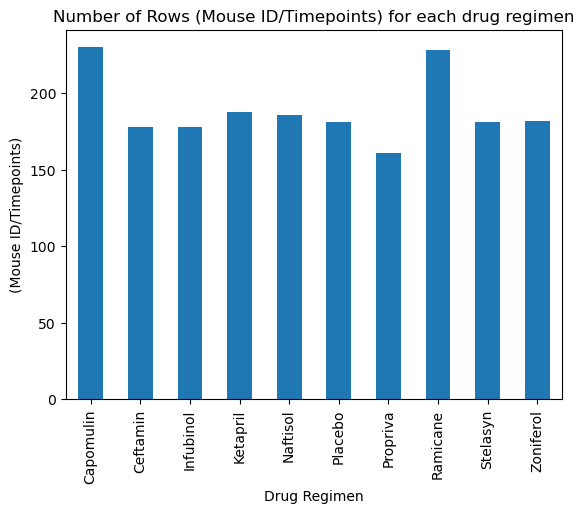

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id_timepoints = clean_df.groupby('Drug Regimen')["Mouse ID"].count()
pandas_bar_plot = mouse_id_timepoints.plot.bar(color='tab:blue')  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("(Mouse ID/Timepoints)")
plt.title("Number of Rows (Mouse ID/Timepoints) for each drug regimen")

plt.show()

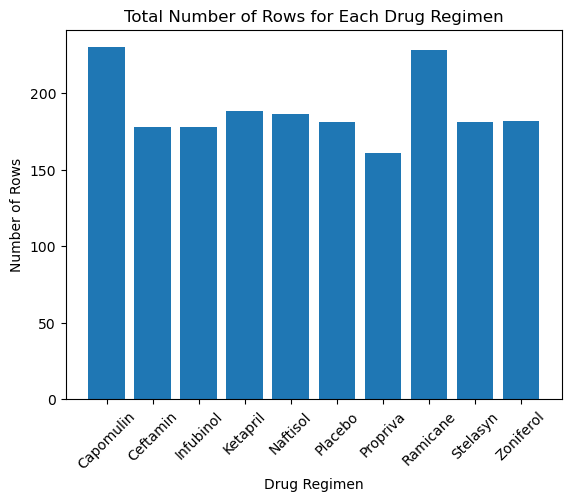

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df.groupby('Drug Regimen').size()
plt.bar(drug_counts.index, drug_counts.values)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Resize the x-axis labels 
plt.xticks(rotation=45)

plt.show()

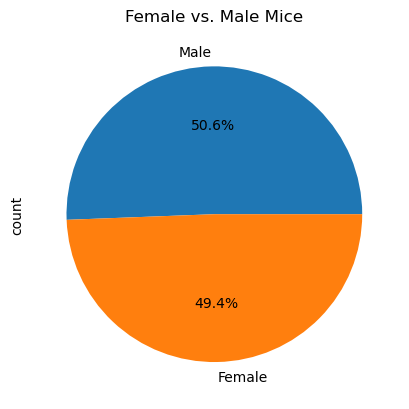

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df["Sex"].value_counts()
sex_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

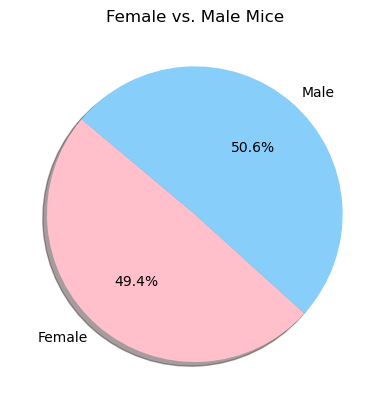

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
colors = ["pink","lightskyblue"]
sizes = [49.4,50.6]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleaned_merged_df = pd.merge(grouped_df, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
cleaned_merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
from sklearn.base import OutlierMixin


treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volumes = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = cleaned_merged_df.loc[cleaned_merged_df['Drug Regimen'] == drug]
    
    # add subset 
    tumor_volumes.append(drug_data['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
for i, drug in enumerate(treatments):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    drug_outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]


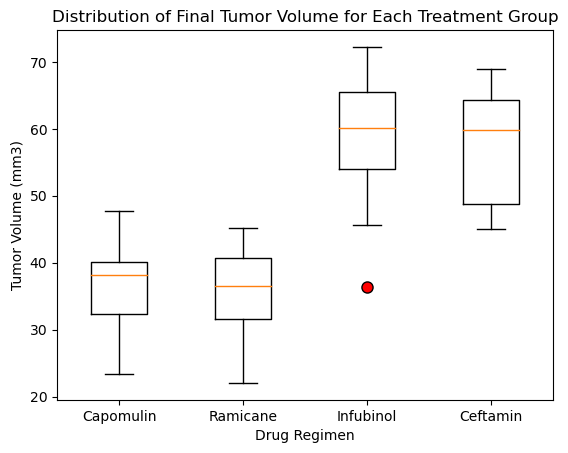

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')
plt.show()


## Line and Scatter Plots

In [77]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [78]:
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

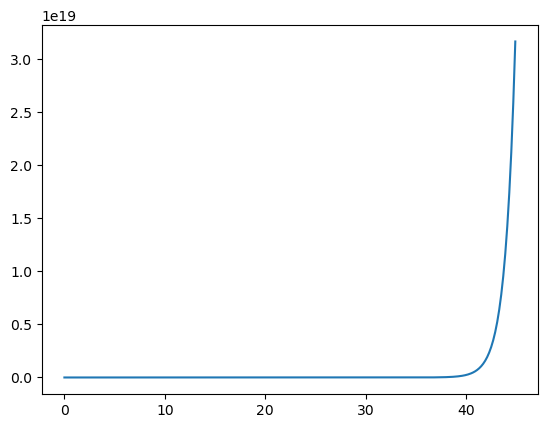

In [79]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = np.arange(0, 45, 0.1)
x_axis

e_x = [np.exp(x) for x in x_axis]
e_x

# Create a graph based upon the list and array we have created
plt.plot(x_axis, e_x)
# Show the graph that we have created
plt.show()


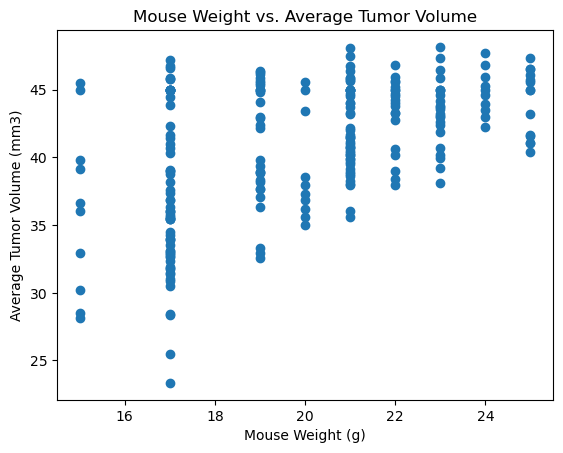

In [80]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume")

plt.show()

## Correlation and Regression

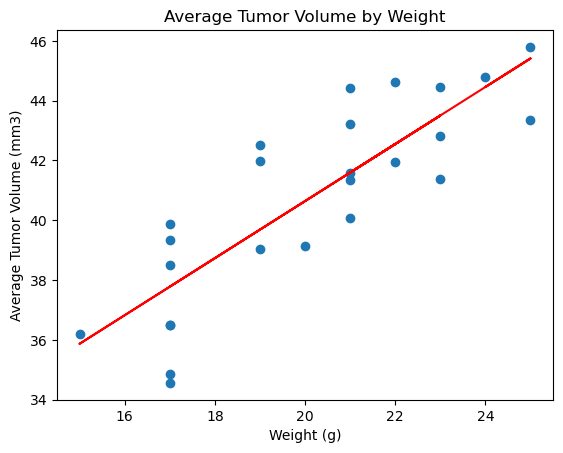

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


In [81]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

correlation = st.pearsonr(x,y)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")